# Classification Tree

In [1]:
import numpy as np
from sklearn import tree, datasets, model_selection
import matplotlib as plt
import seaborn as sns
from math import inf
import graphviz
from tparbressource import *

sns.set()

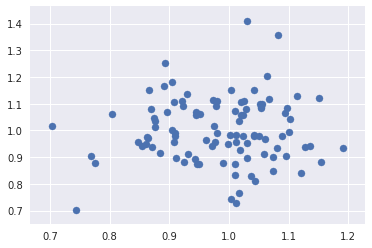

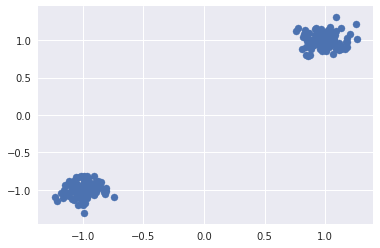

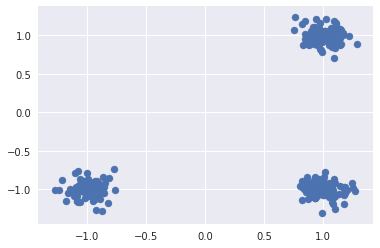

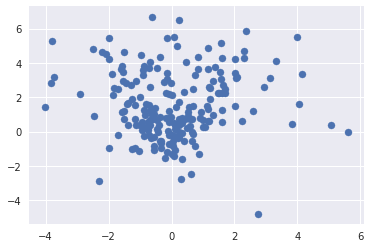

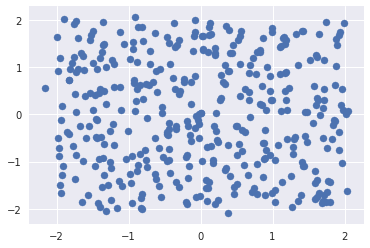

In [2]:
plot_2d_simple(rand_gauss())
plt.show()
plot_2d_simple(rand_bi_gauss())
plt.show()
plot_2d_simple(rand_tri_gauss())
plt.show()
plot_2d_simple(rand_clown())
plt.show()
plot_2d_simple(rand_checkers())
plt.show()

## Decision tree - CART algorithm

### Question 1

In the case of regression, the use of the mean squarred error seems an appropriate choice: it provides a good and simple enough measure of how many points are on which side of the decision frontiere.

### Question 2

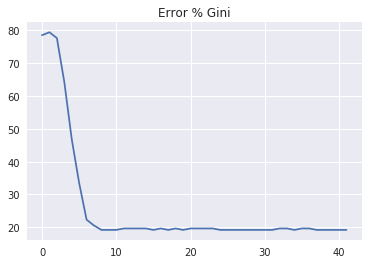

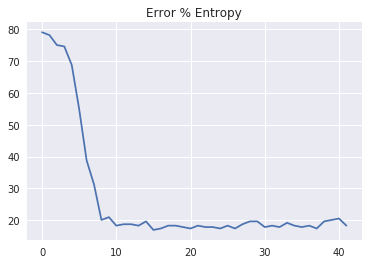

In [3]:
d = rand_checkers(112, 112, 112, 112)

errG = []
for i in range(42):
    trG = tree.DecisionTreeClassifier("gini", max_depth=i+1)
    trG.fit(d[:224,:2], d[:224,2])
    errG.append((1 - trG.score(d[224:,:2], d[224:,2]))*100)

errH = []
errHmin = inf
trHmin = tree.DecisionTreeClassifier()
for i in range(42):
    trH = tree.DecisionTreeClassifier("entropy", max_depth=i+1)
    trH.fit(d[:224,:2], d[:224,2])
    err = (1 - trH.score(d[224:,:2], d[224:,2]))*100
    errH.append(err)
    if err < errHmin:
        trHmin = trH
        errHmin = err

plt.clf()
plt.plot(errG)
plt.title("Error % Gini")
plt.show()
plt.plot(errH)
plt.title("Error % Entropy")
plt.show()

The dataset does not show any clearly defined area for a given class, it thus seems logical that a deep tree is needed to give an adequate description of the distribution.

### Question 3

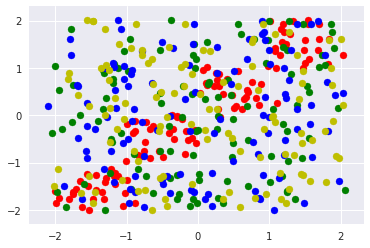

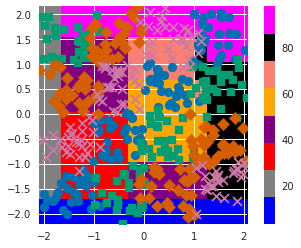

In [4]:
plt.clf()
plt.scatter(d[d[:,2]==0, 0], d[d[:,2]==0, 1], c="r")
plt.scatter(d[d[:,2]==1, 0], d[d[:,2]==0, 1], c="g")
plt.scatter(d[d[:,2]==2, 0], d[d[:,2]==0, 1], c="b")
plt.scatter(d[d[:,2]==3, 0], d[d[:,2]==0, 1], c="y")
plt.show()

plt.clf()
plot_2d(d[:,:2], d[:, 2])
frontiere(trHmin.apply, d[224:,:2])
plt.show()

### Question 4

In [5]:
dot_data = tree.export_graphviz(trHmin, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("min_H_tree")

'min_H_tree.pdf'

### Question 5

In [6]:
d2 = rand_checkers(40, 40, 40, 40)
print("Error:", (1 - trHmin.score(d2[:, :2], d2[:, 2]))*100, "%")

Error: 20.625 %


That error is much lower than what I would have expected for a random distribution. The only regularity I see is the checker style of the distribution, but it seems to be too little regularity to explain such a low error.

### Question 6

In [7]:
digits, targets = datasets.load_digits(return_X_y=True)

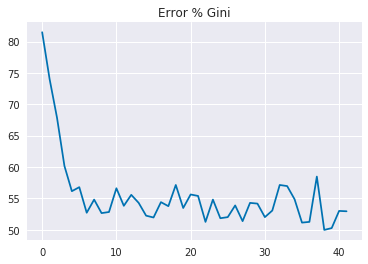

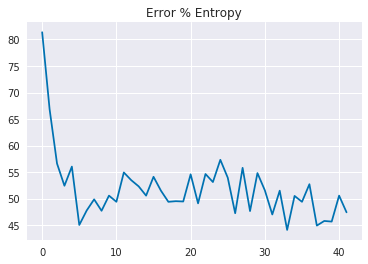

In [8]:
errG = []
for i in range(42):
    trG = tree.DecisionTreeClassifier("gini", max_depth=i+1)
    trG.fit(digits[:80,], targets[:80])
    errG.append((1 - trG.score(digits[80:,], targets[80:]))*100)

errH = []
errHmin = inf
trHmin = tree.DecisionTreeClassifier()
for i in range(42):
    trH = tree.DecisionTreeClassifier("entropy", max_depth=i+1)
    trH.fit(digits[:80,], targets[:80])
    err = (1 - trH.score(digits[80:,], targets[80:]))*100
    errH.append(err)
    if err < errHmin:
        trHmin = trH
        errHmin = err

plt.clf()
plt.plot(errG)
plt.title("Error % Gini")
plt.show()
plt.plot(errH)
plt.title("Error % Entropy")
plt.show()

The prediction is rather bad, a tree does not seem to be a sensible approach compared to a classical perceptron - i.e. one using gradient.

## Parameter choice methods - Model selection

### Question 7

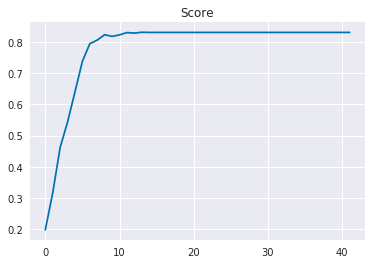

In [9]:
err = []
errMin = inf
for i in range(42):
    t = tree.DecisionTreeClassifier(max_depth=i+1)
    err.append(model_selection.cross_val_score(t, digits, targets, cv=9, n_jobs=-1).mean())

plt.clf()
plt.title("Score")
plt.plot(err)
plt.show()

maxd = np.array(err).argmax() + 1
t = tree.DecisionTreeClassifier(max_depth=maxd)

### Question 8

In [10]:
ntrain, train, test = model_selection.learning_curve(t, digits, targets, cv=9, n_jobs=-1)

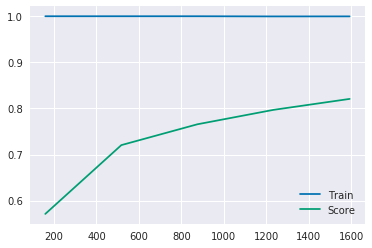

In [11]:
plt.clf()
plt.plot(ntrain, train.mean(axis=1), label='Train')
plt.plot(ntrain, test.mean(axis=1), label='Score')
plt.legend()
plt.show()

The training & testing scores clearly do not meet yet, possibly because the dataset is too small.